In [ ]:
#pip install --upgrade tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [8]:
df=pd.read_csv('총데이터4월_1월.csv')
df

,date,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
0,2021-04-09 00:00:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
1,2021-04-09 00:01:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2,2021-04-09 00:02:00,64.0,0.0,754.6,23.0,24.0,0.0,0.00000,23.5
3,2021-04-09 00:03:00,64.0,-0.1,754.6,23.0,24.0,0.0,-0.07546,23.5
4,2021-04-09 00:04:00,64.0,0.0,754.5,23.0,24.0,0.0,0.00000,23.5
...,...,...,...,...,...,...,...,...,...
351824,2022-01-28 06:46:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
351825,2022-01-28 06:47:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
351826,2022-01-28 06:48:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
351827,2022-01-28 06:49:00,40.0,0.3,717.6,21.0,20.0,0.0,0.21528,20.5


In [10]:
df.index = pd.to_datetime(df['date'])
df1= df.drop(['date'], axis=1)
df1

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
date,,,,,,,,
2021-04-09 00:00:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2021-04-09 00:01:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2021-04-09 00:02:00,64.0,0.0,754.6,23.0,24.0,0.0,0.00000,23.5
2021-04-09 00:03:00,64.0,-0.1,754.6,23.0,24.0,0.0,-0.07546,23.5
2021-04-09 00:04:00,64.0,0.0,754.5,23.0,24.0,0.0,0.00000,23.5
...,...,...,...,...,...,...,...,...
2022-01-28 06:46:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
2022-01-28 06:47:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
2022-01-28 06:48:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5


In [76]:
df3=df.drop(['temp'],axis=1)
T =  df['temp']-5
df2 = pd.concat([df3,T],axis=1)
df2 = df2.drop(['date'],axis=1)
df2

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
date,,,,,,,,
2021-04-09 00:00:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,18.5
2021-04-09 00:01:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,18.5
2021-04-09 00:02:00,64.0,0.0,754.6,23.0,24.0,0.0,0.00000,18.5
2021-04-09 00:03:00,64.0,-0.1,754.6,23.0,24.0,0.0,-0.07546,18.5
2021-04-09 00:04:00,64.0,0.0,754.5,23.0,24.0,0.0,0.00000,18.5
...,...,...,...,...,...,...,...,...
2022-01-28 06:46:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,15.5
2022-01-28 06:47:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,15.5
2022-01-28 06:48:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,15.5


In [39]:
#년 월 데이터
pr_m = pd.period_range(start = '2021-04',
                       end= None,
                       periods =10,
                      freq= 'M')
pr_12m = df.loc['2021-12']
pr_12m = pr_12m.drop(['date'],axis=1)

In [13]:
#학습용
train_set = df2.loc['2021-04-09 00:00:00':'2022-11-30 23:59:00']
#테스트용
test_set = df2.loc['2021-12-01 00:00:00 ':'2022-12-31 23:59:00']

In [14]:
#평균, 표준편차
train_stats = train_set.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
soc,351829.0,20.093938,16.463198,5.000,9.00000,9.00000,37.00000,81.00000
dcA,351829.0,0.091301,7.790700,-30.000,-0.10000,0.10000,0.20000,44.70000
dcV,351829.0,677.782278,32.560036,624.500,653.80000,658.80000,714.30000,785.40000
minTemp,351829.0,22.437323,2.147537,16.000,21.00000,22.00000,24.00000,34.00000
maxTemp,351829.0,22.125075,2.485265,13.000,21.00000,22.00000,23.00000,32.00000
차이*총량,351829.0,-0.000092,0.183832,-38.304,0.00000,0.00000,0.00000,5.98500
P(kw),351829.0,0.083900,5.456595,-20.154,-0.06512,0.06521,0.13082,29.89378
temp,351829.0,17.281199,2.068078,9.500,16.00000,17.50000,18.50000,26.50000


In [15]:
#정규화 z변환
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

#학습용 데이터 정규화
normed_train_data = norm(train_set)
#테스트용 데이터 정규화
normed_test_data = norm(test_set)

In [16]:
#학습용 데이터 값 추출
normed_train_data = normed_train_data.values
# 테스트용 데이터 값 추출
normed_test_data = normed_test_data.values

In [17]:
#시간 지연을 갖는 입출력 데이터 만들기
def build_dataset(ts):
  dataX = []
  dataY = []
  for i in range(0, len(ts)-1):
    _x = ts[i,:]
    _y = ts[i+1,-1]
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)
#x에서는 현재 시간에 따른 값을 가져오기
#Y에서는 현재 시간에 따른 다음 시간의 값을 가져오기

#학습용
normed_trainX, normed_trainY = build_dataset(normed_train_data)
#테스트용
normed_testX, normed_testY = build_dataset(normed_test_data)


In [18]:
normed_testX, normed_testY

(array([[-6.73862895e-01,  1.39524551e-02, -7.15056873e-01, ...,
          4.99696099e-04,  8.61336851e-03, -1.34482300e+00],
        [-6.73862895e-01,  1.39524551e-02, -7.15056873e-01, ...,
          4.99696099e-04,  8.61336851e-03, -1.34482300e+00],
        [-6.73862895e-01,  1.39524551e-02, -7.15056873e-01, ...,
          4.99696099e-04,  8.61336851e-03, -1.34482300e+00],
        ...,
        [ 1.20912485e+00,  1.39524551e-02,  1.22290165e+00, ...,
          4.99696099e-04,  1.09261662e-02, -8.61282284e-01],
        [ 1.20912485e+00,  1.39524551e-02,  1.22290165e+00, ...,
          4.99696099e-04,  1.09261662e-02, -8.61282284e-01],
        [ 1.20912485e+00,  2.67882717e-02,  1.22290165e+00, ...,
          4.99696099e-04,  2.40772253e-02, -8.61282284e-01]]),
 array([-1.344823  , -1.344823  , -1.344823  , ..., -0.86128228,
        -0.86128228, -0.86128228]))

In [19]:
#DNN 모델 설계
def build_model():
  #모델 구조
  model = keras.Sequential([
                            keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[8]),#입력층
                            keras.layers.Dense(64,activation=tf.nn.relu), #은닉층 1
                            keras.layers.Dense(32, activation=tf.nn.relu), #은닉층 2
                            keras.layers.Dense(1) #출력층
  ])

  #모델 최적화
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

  #모델 컴파일
  model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error','mean_squared_error'])
  return model

model= build_model()
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [20]:
#모델 학습
history = model.fit(normed_trainX, normed_trainY, epochs=100)

Epoch 1/100
10995/10995 [==============================] - 17s 1ms/step - loss: 0.0337 - mean_absolute_error: 0.0888 - mean_squared_error: 0.0337
Epoch 2/100
10995/10995 [==============================] - 16s 1ms/step - loss: 0.0126 - mean_absolute_error: 0.0492 - mean_squared_error: 0.0126
Epoch 3/100
10995/10995 [==============================] - 16s 1ms/step - loss: 0.0122 - mean_absolute_error: 0.0462 - mean_squared_error: 0.0122
Epoch 4/100
10995/10995 [==============================] - 16s 1ms/step - loss: 0.0120 - mean_absolute_error: 0.0447 - mean_squared_error: 0.0120
Epoch 5/100
10995/10995 [==============================] - 16s 1ms/step - loss: 0.0119 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0119
Epoch 6/100
10995/10995 [==============================] - 16s 1ms/step - loss: 0.0118 - mean_absolute_error: 0.0430 - mean_squared_error: 0.0118
Epoch 7/100
10995/10995 [==============================] - 16s 1ms/step - loss: 0.0118 - mean_absolute_error: 0.0424 - mean_

In [21]:
#학습 과정 결과 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mean_absolute_error,mean_squared_error,epoch
0,0.033731,0.088845,0.033731,0
1,0.012562,0.049169,0.012562,1
2,0.012189,0.046231,0.012189,2
3,0.012003,0.044720,0.012003,3
4,0.011903,0.043678,0.011903,4
...,...,...,...,...
95,0.011184,0.039318,0.011184,95
96,0.011156,0.039247,0.011156,96
97,0.011160,0.039236,0.011160,97
98,0.011166,0.039270,0.011166,98


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


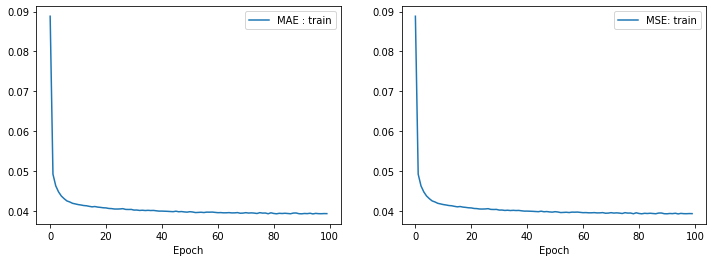

In [22]:
#시각화
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['epoch'],hist['mean_absolute_error'],label="MAE : train")
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['epoch'],hist['mean_absolute_error'], label='MSE: train')
plt.xlabel('Epoch')
plt.legend()

In [23]:
#예측 수행
normed_test_predictions = model.predict(normed_testX).flatten()
normed_test_predictions

array([-1.3451003 , -1.3451003 , -1.3451003 , ..., -0.85630065,
       -0.8563007 , -0.85656387], dtype=float32)

In [24]:
#비정규화
def denorm(y):
  return y*train_stats['std'][2] +train_stats['mean'][2]

testY = denorm(normed_testY)
testY_predictions = denorm(normed_test_predictions)
  

In [48]:
testY_predictions

array([633.9858, 633.9858, 633.9858, ..., 649.9011, 649.9011, 649.8925],
      dtype=float32)

No handles with labels found to put in legend.


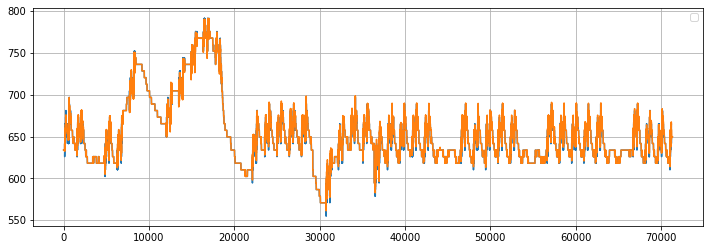

In [47]:
#출력 비교
plt.figure(figsize=(12,4))
plt.plot(testY) #주황
plt.plot(testY_predictions) #파랑
plt.grid()
plt.legend()

#12월 예측

In [79]:
df1=df.drop(['date'],axis=1)
df1

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
date,,,,,,,,
2021-04-09 00:00:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2021-04-09 00:01:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2021-04-09 00:02:00,64.0,0.0,754.6,23.0,24.0,0.0,0.00000,23.5
2021-04-09 00:03:00,64.0,-0.1,754.6,23.0,24.0,0.0,-0.07546,23.5
2021-04-09 00:04:00,64.0,0.0,754.5,23.0,24.0,0.0,0.00000,23.5
...,...,...,...,...,...,...,...,...
2022-01-28 06:46:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
2022-01-28 06:47:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
2022-01-28 06:48:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5


In [80]:
#학습용
train_set_1 = df1.loc['2021-04-09 00:00:00':'2022-11-30 23:59:00']
#테스트용
test_set_1 = df1.loc['2021-12-01 00:00:00 ':'2022-12-31 23:59:00']

In [81]:
#평균, 표준편차
train_stats_1 = train_set_1.describe().transpose()
train_stats_1

,count,mean,std,min,25%,50%,75%,max
soc,351829.0,20.093938,16.463198,5.000,9.00000,9.00000,37.00000,81.00000
dcA,351829.0,0.091301,7.790700,-30.000,-0.10000,0.10000,0.20000,44.70000
dcV,351829.0,677.782278,32.560036,624.500,653.80000,658.80000,714.30000,785.40000
minTemp,351829.0,22.437323,2.147537,16.000,21.00000,22.00000,24.00000,34.00000
maxTemp,351829.0,22.125075,2.485265,13.000,21.00000,22.00000,23.00000,32.00000
차이*총량,351829.0,-0.000092,0.183832,-38.304,0.00000,0.00000,0.00000,5.98500
P(kw),351829.0,0.083900,5.456595,-20.154,-0.06512,0.06521,0.13082,29.89378
temp,351829.0,22.281199,2.068078,14.500,21.00000,22.50000,23.50000,31.50000


In [82]:
#정규화 z변환
def norm1(x):
  return (x-train_stats_1['mean'])/train_stats_1['std']

#학습용 데이터 정규화
normed_train_data1 = norm1(train_set_1)
#테스트용 데이터 정규화
normed_test_data1 = norm1(test_set_1)

In [83]:
#학습용 데이터 값 추출
normed_train_data1 = normed_train_data1.values
# 테스트용 데이터 값 추출
normed_test_data1 = normed_test_data1.values

In [84]:
#시간 지연을 갖는 입출력 데이터 만들기
def build_dataset1(ts):
  dataX1 = []
  dataY1 = []
  for i in range(0, len(ts)-1):
    _x = ts[i,:]
    _y = ts[i+1,-1]
    dataX1.append(_x)
    dataY1.append(_y)
  return np.array(dataX1), np.array(dataY1)
#x에서는 현재 시간에 따른 값을 가져오기
#Y에서는 현재 시간에 따른 다음 시간의 값을 가져오기

#학습용
normed_trainX1, normed_trainY1 = build_dataset1(normed_train_data1)
#테스트용
normed_testX1, normed_testY1 = build_dataset1(normed_test_data1)


In [85]:
#DNN 모델 설계
def build_model():
  #모델 구조
  model = keras.Sequential([
                            keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[8]),#입력층
                            keras.layers.Dense(64,activation=tf.nn.relu), #은닉층 1
                            keras.layers.Dense(32, activation=tf.nn.relu), #은닉층 2
                            keras.layers.Dense(1) #출력층
  ])

  #모델 최적화
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

  #모델 컴파일
  model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error','mean_squared_error'])
  return model

model= build_model()
model.summary()  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1152      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [86]:
#모델 학습
history = model.fit(normed_trainX1, normed_trainY1, epochs=100)

Epoch 1/100
10995/10995 [==============================] - 21s 2ms/step - loss: 0.0375 - mean_absolute_error: 0.0864 - mean_squared_error: 0.0375
Epoch 2/100
10995/10995 [==============================] - 21s 2ms/step - loss: 0.0123 - mean_absolute_error: 0.0452 - mean_squared_error: 0.0123
Epoch 3/100
10995/10995 [==============================] - 25s 2ms/step - loss: 0.0121 - mean_absolute_error: 0.0435 - mean_squared_error: 0.0121
Epoch 4/100
10995/10995 [==============================] - 22s 2ms/step - loss: 0.0119 - mean_absolute_error: 0.0426 - mean_squared_error: 0.0119
Epoch 5/100
10995/10995 [==============================] - 28s 3ms/step - loss: 0.0119 - mean_absolute_error: 0.0421 - mean_squared_error: 0.0119
Epoch 6/100
10995/10995 [==============================] - 27s 2ms/step - loss: 0.0118 - mean_absolute_error: 0.0418 - mean_squared_error: 0.0118
Epoch 7/100
10995/10995 [==============================] - 37s 3ms/step - loss: 0.0117 - mean_absolute_error: 0.0414 - mean_

In [87]:
#예측 수행
normed_test_predictions1 = model.predict(normed_testX1).flatten()
normed_test_predictions1

array([-1.3394359, -1.3394359, -1.3394359, ..., -0.8502008, -0.8502008,
       -0.8498306], dtype=float32)

In [88]:
#비정규화
def denorm(y):
  return y*train_stats_1['std'][2] +train_stats_1['mean'][2]

testY1 = denorm(normed_testY1)
testY_predictions1 = denorm(normed_test_predictions1)

No handles with labels found to put in legend.


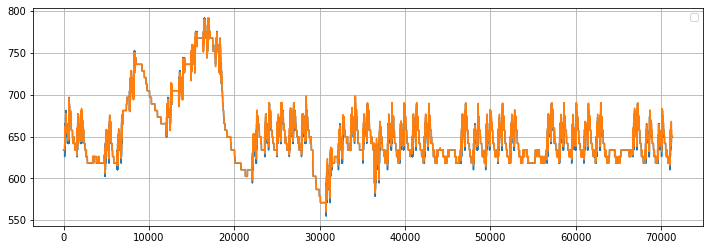

In [89]:
#출력 비교
plt.figure(figsize=(12,4))
plt.plot(testY1) #주황
plt.plot(testY_predictions1) #파랑
plt.grid()
plt.legend()

12월달 -5도 차이 예측 결과 차이

No handles with labels found to put in legend.


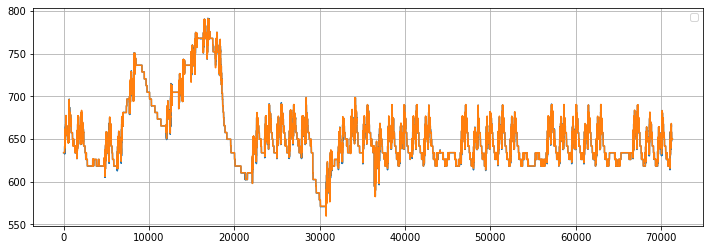

In [90]:
#출력 비교
plt.figure(figsize=(12,4))
plt.plot(testY_predictions) #주황
plt.plot(testY_predictions1) #파랑
plt.grid()
plt.legend()